In [27]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import numpy as np
import pprint
import matplotlib.pyplot as plt
from ResoFit.experiment import Experiment
import peakutils as pku
from ResoFit.simulation import Simulation
from scipy import signal
import scipy
from ResoFit._utilities import Layer

In [28]:
%matplotlib notebook

In [29]:
layers = Layer()
layers.add_layer(layer='Ta', thickness_mm=0.127)
energy_min = 4.1
energy_max = 800
energy_step = 0.01
simu = Simulation(energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          )
simu.add_Layer(layer=layers)

In [30]:
folder = 'data/IPTS_20439/reso_data_20439'
sample_name = ['No Pb', '5mm Pb', '10mm Pb']
data_file = ['Ta_no_lead_6C.csv', 'Ta_5mm_lead_4C_norm_to_2C.csv', 'Ta_10mm_lead_6C.csv']
norm_to_file = ['blank_no_lead_6C.csv', 'blank_5mm_lead_4C_norm_to_2C.csv', 'blank_10mm_lead_6C.csv']
norm_factor = [0.96, 1.05, 1]
spectra_file = 'Ta_lead_10mm__0__040_Spectra.txt'


baseline = False
deg = 6
# x_axis = 'number'
logx = False
# # # Calibrate the peak positions
x_type = 'energy'
y_type = 'transmission'
source_to_detector_m = 16.45
offset_us = 0
fmt = 'o'
lw = 1

<IPython.core.display.Javascript object>


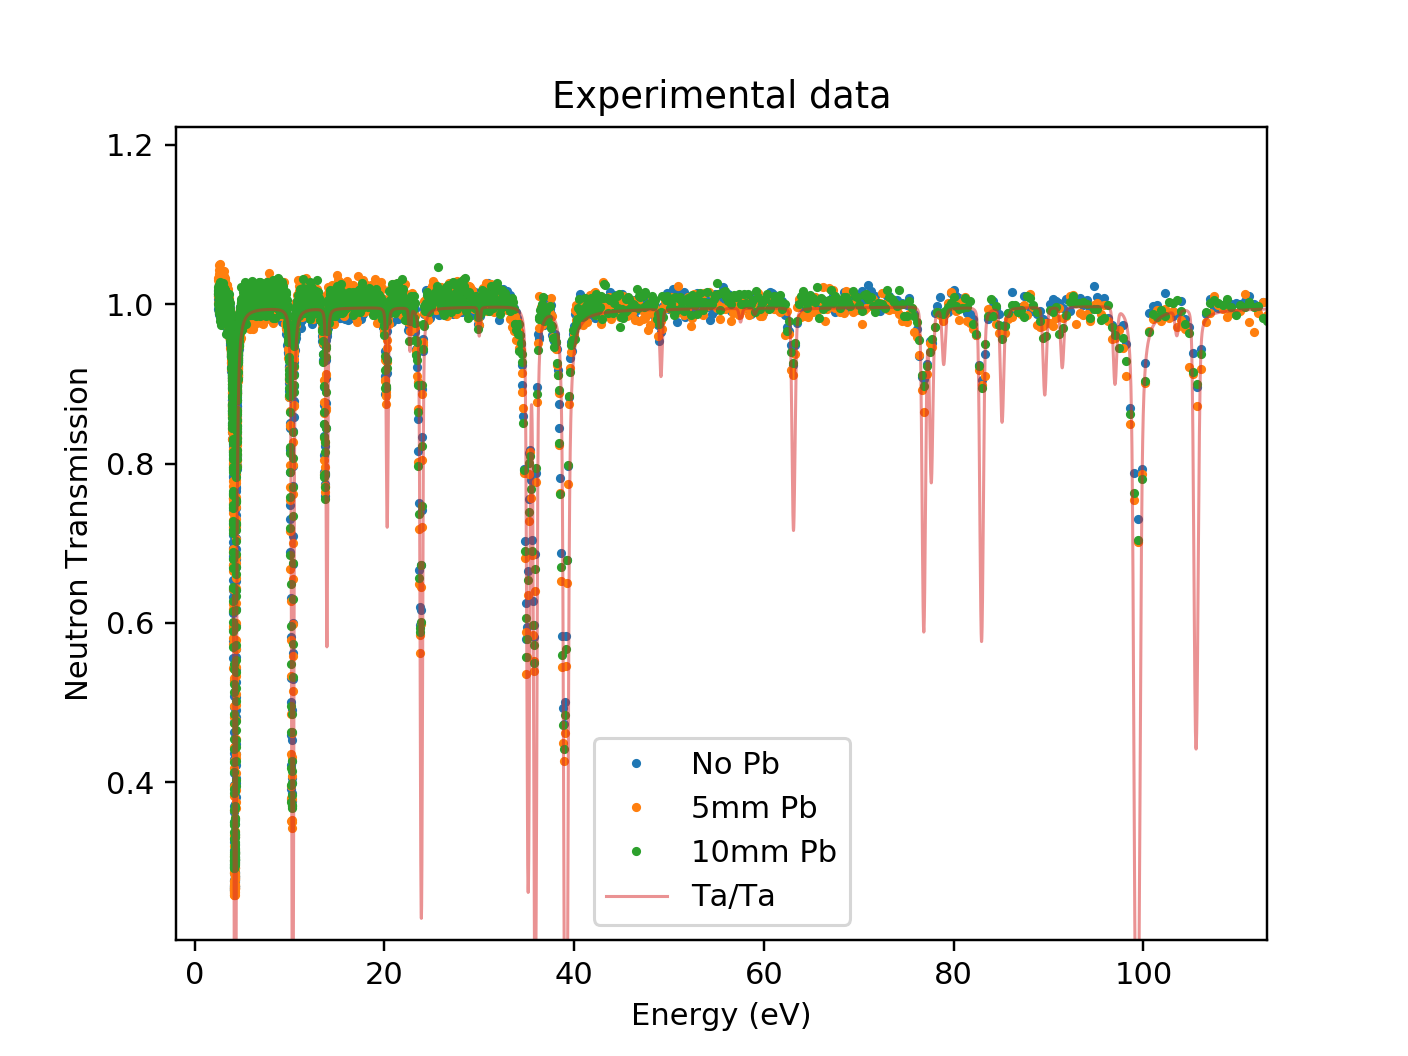

(5, 120)

In [31]:
exps = {}
ax0 = None

for _index, each_name in enumerate(sample_name):
    exps[each_name] = Experiment(spectra_file=spectra_file, data_file=data_file[_index], folder=folder)
    exps[each_name].norm_to(file=norm_to_file[_index], norm_factor=norm_factor[_index])
    if ax0 is None:
        ax0 = exps[each_name].plot(x_type=x_type, y_type=y_type,
                                   source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                                   logx=logx, baseline=baseline, deg=deg, fmt=fmt, lw=lw, label=each_name)
    else:
        ax0 = exps[each_name].plot(ax_mpl=ax0, x_type=x_type, y_type=y_type,
                                   source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                                   logx=logx, baseline=baseline, deg=deg, fmt=fmt, lw=lw, label=each_name)

        # simu.plot(ax_mpl=ax0[i], x_type='energy', y_type='attenuation',
        #           source_to_detector_m=source_to_detector_m, offset_us=offset_us, logx=True,
        #           mixed=False, all_layers=False, all_elements=False, items_to_plot=[_ele],
        #           fmt='-.', lw=1, alpha=1)
simu.plot(ax_mpl=ax0, x_type=x_type, y_type=y_type,
          source_to_detector_m=source_to_detector_m, offset_us=offset_us,
          logx=logx, mixed=False, all_layers=False, all_elements=False, items_to_plot=['Ta'],
             fmt='-', lw=1, alpha=0.5)

plt.xlim(5, 120)